In [1]:
from sklearn import datasets
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

X, y = datasets.load_diabetes(as_frame=True, scaled=False, return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def model_estimation(model, y_train, y_test, y_pred_train, y_pred_test):
    """
    Evaluate the model using MAE. 
    Inputs:
        model: the model to be evaluated
        y_train: the true y values of the train dataset
        y_test: the true y values of the test dataset
        y_pred_train: the predicted y values of the train dataset
        y_pred_test: the predicted y values of the test dataset
    Returns:
        None. 
        Print the MAE of the train and test datasets and the equation of the model.
        Plots of the residuals, percentage error, and histogram of the percentage error.
    """
    # create three subplots in one row
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
    # plot a scatter plot of the residuals
    ax1.scatter(y_test, y_test - y_pred_test)
    ax1.set_xlabel('$y_{test}$')
    ax1.set_ylabel('Residual $*(y_{test} - y_{pred}) / y_{test})$')
    ax1.set_title('Residuals')
    # plot a scatter plot of the percentage error
    ax2.scatter(y_test, 100. * (y_test - y_pred_test) / y_test)
    ax2.set_xlabel('$y_{test}$')
    ax2.set_ylabel('percentage error $100*(y_{test} - y_{pred}) / y_{test})$')
    ax2.set_title('Percentage error (%)')
    # plot a histogram of the percentage error
    ax3.hist(100. * (y_test - y_pred_test) / y_test, bins=20)
    ax3.set_xlabel('percentage error $100*(y_{test} - y_{pred}) / y_{test})$')
    ax3.set_ylabel('Frequency (number of test samples)')
    ax3.set_title('Histogram of percentage error (%)')

    print(f'Test Dataset: Mean Absolute Error: {mean_absolute_error(y_test, y_pred_test):.2f}')
    print(f'Train Dataset: Mean Absolute Error: {mean_absolute_error(y_train, y_pred_train):.2f}')

    # print the equation
    print('y = ', end='')
    for i, coef in enumerate(model.coef_):
        print(f'{coef:.2f} * x_{i} + ', end='')
    print(f'{model.intercept_:.2f}')
    fig.tight_layout()


Test Dataset: Mean Absolute Error: 42.79
Train Dataset: Mean Absolute Error: 43.48
y = 0.14 * x_0 + -23.06 * x_1 + 5.85 * x_2 + 1.20 * x_3 + -1.28 * x_4 + 0.81 * x_5 + 0.60 * x_6 + 10.16 * x_7 + 67.11 * x_8 + 0.20 * x_9 + -341.38


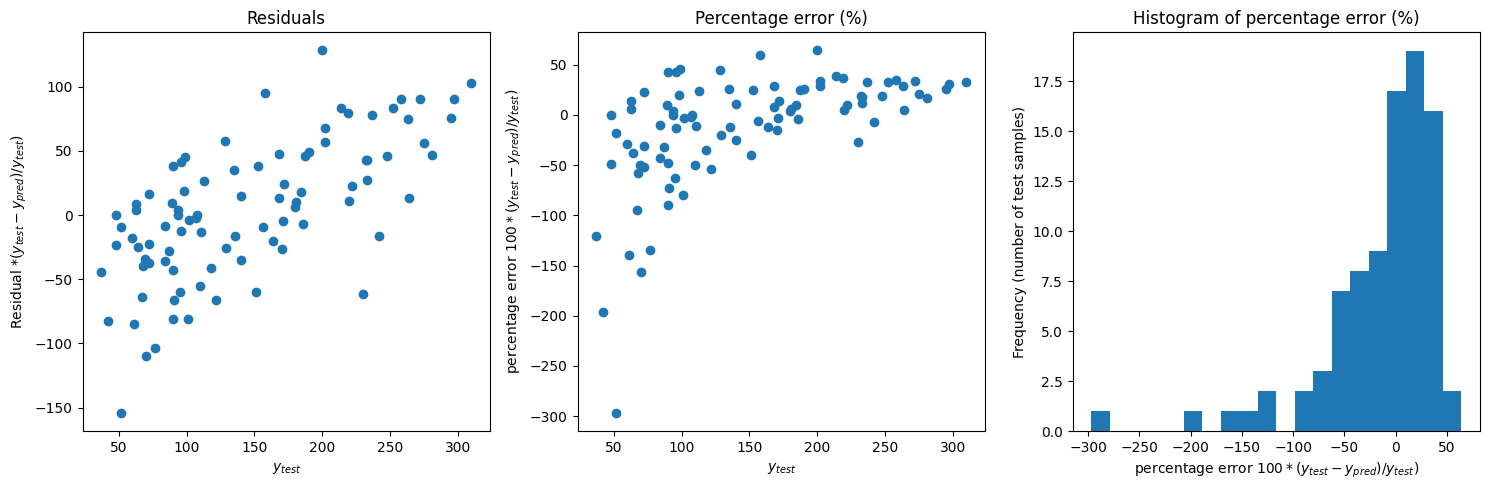

In [2]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)

model_estimation(model, y_train, y_test, y_pred_train, y_pred_test)

# Show the plots
plt.show()


Test Dataset: Mean Absolute Error: 43.58
Train Dataset: Mean Absolute Error: 39.14
y = -9.59 * x_0 + -11.24 * x_1 + -19.70 * x_2 + 10.64 * x_3 + -16.59 * x_4 + 26.14 * x_5 + 11.13 * x_6 + -160.29 * x_7 + -1768.67 * x_8 + -13.82 * x_9 + 0.03 * x_10 + 0.53 * x_11 + -0.05 * x_12 + 0.01 * x_13 + -0.00 * x_14 + -0.04 * x_15 + 0.08 * x_16 + 1.31 * x_17 + 0.41 * x_18 + 0.01 * x_19 + -33.71 * x_20 + 0.36 * x_21 + 0.41 * x_22 + 0.21 * x_23 + 0.25 * x_24 + -1.24 * x_25 + -26.74 * x_26 + 18.52 * x_27 + 0.27 * x_28 + 0.09 * x_29 + 0.12 * x_30 + -0.09 * x_31 + 0.12 * x_32 + -0.01 * x_33 + -1.43 * x_34 + 3.63 * x_35 + 0.02 * x_36 + -0.00 * x_37 + 0.09 * x_38 + -0.08 * x_39 + -0.11 * x_40 + -0.18 * x_41 + -2.48 * x_42 + -0.05 * x_43 + 0.18 * x_44 + -0.28 * x_45 + -0.31 * x_46 + -1.28 * x_47 + -5.05 * x_48 + -0.04 * x_49 + 0.11 * x_50 + 0.20 * x_51 + 0.37 * x_52 + 3.38 * x_53 + 0.03 * x_54 + 0.15 * x_55 + 2.20 * x_56 + 4.46 * x_57 + 0.12 * x_58 + 16.31 * x_59 + 15.19 * x_60 + 0.86 * x_61 + 273.67 * x_

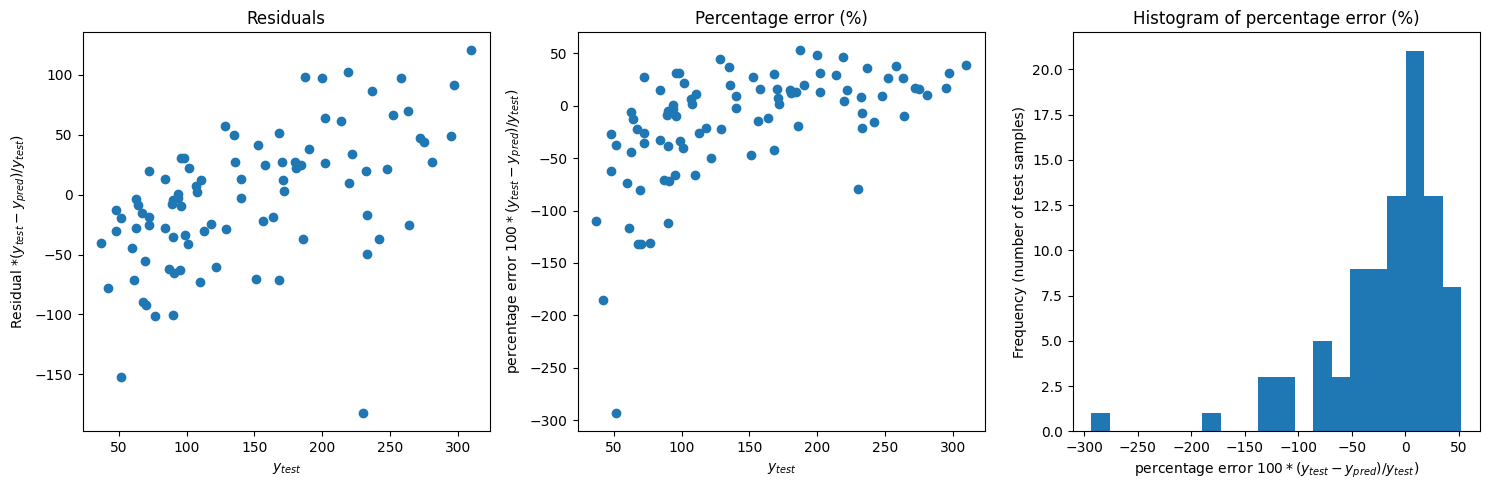

In [4]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)

# Transform the original features to polynomial features
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# Create a linear regression model
model = LinearRegression()

# Train the model on the training data with polynomial features
model.fit(X_train_poly, y_train)

# Make predictions on the test data with polynomial features
y_pred_test = model.predict(X_test_poly)
y_pred_train = model.predict(X_train_poly)

# Evaluate the model using the model_estimation function
model_estimation(model, y_train, y_test, y_pred_train, y_pred_test)

# Show the plots
plt.show()

In [6]:
import numpy as np

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Make predictions using the linear regression model
y_pred_linear_train = linear_model.predict(X_train)
y_pred_linear_test = linear_model.predict(X_test)

# Create a PolynomialFeatures transformer for 2nd-degree polynomial features
poly_features = PolynomialFeatures(degree=2, include_bias=False)

# Transform the original features to polynomial features
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# Create a linear regression model for polynomial regression
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

# Make predictions using the polynomial regression model
y_pred_poly_train = poly_model.predict(X_train_poly)
y_pred_poly_test = poly_model.predict(X_test_poly)

# Calculate MAE and MAPE for both models
def calculate_mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mae_linear_train = mean_absolute_error(y_train, y_pred_linear_train)
mae_linear_test = mean_absolute_error(y_test, y_pred_linear_test)
mape_linear_train = calculate_mape(y_train, y_pred_linear_train)
mape_linear_test = calculate_mape(y_test, y_pred_linear_test)

mae_poly_train = mean_absolute_error(y_train, y_pred_poly_train)
mae_poly_test = mean_absolute_error(y_test, y_pred_poly_test)
mape_poly_train = calculate_mape(y_train, y_pred_poly_train)
mape_poly_test = calculate_mape(y_test, y_pred_poly_test)

# Print the results
print("Linear Regression Model:")
print(f"Train MAE: {mae_linear_train:.2f}")
print(f"Test MAE: {mae_linear_test:.2f}")
print(f"Train MAPE: {mape_linear_train:.2f}%")
print(f"Test MAPE: {mape_linear_test:.2f}%")

print("\nPolynomial Regression Model (2nd degree):")
print(f"Train MAE: {mae_poly_train:.2f}")
print(f"Test MAE: {mae_poly_test:.2f}")
print(f"Train MAPE: {mape_poly_train:.2f}%")
print(f"Test MAPE: {mape_poly_test:.2f}%")

Linear Regression Model:
Train MAE: 43.48
Test MAE: 42.79
Train MAPE: 38.92%
Test MAPE: 37.50%

Polynomial Regression Model (2nd degree):
Train MAE: 39.14
Test MAE: 43.58
Train MAPE: 34.39%
Test MAPE: 38.29%


In [8]:
from sklearn.metrics import r2_score
r2_linear_test = r2_score(y_test, y_pred_linear_test)
# Calculate R-squared for polynomial regression
r2_poly_test = r2_score(y_test, y_pred_poly_test)

# Print the R-squared scores
print("\nR-squared (R²) Score:")
print(f"Linear Regression Model: R² = {r2_linear_test:.2f}")
print(f"Polynomial Regression Model (2nd degree): R² = {r2_poly_test:.2f}")


R-squared (R²) Score:
Linear Regression Model: R² = 0.45
Polynomial Regression Model (2nd degree): R² = 0.42


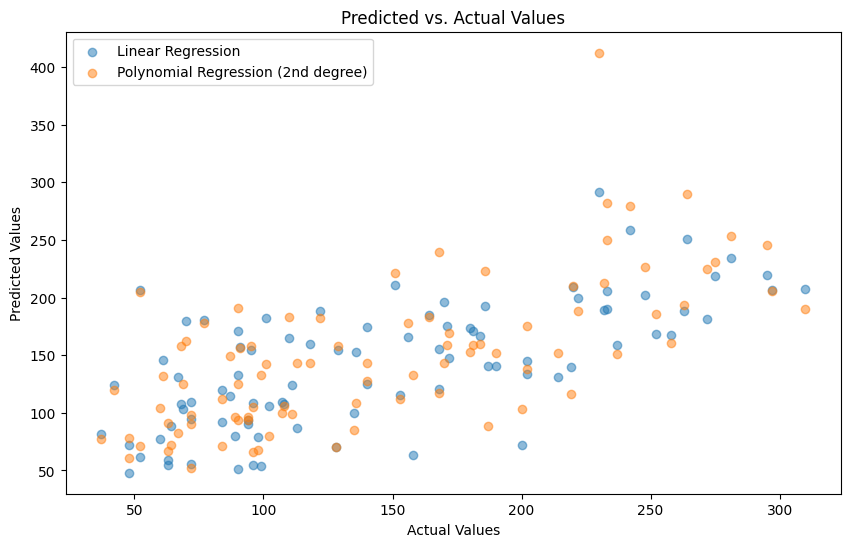

In [9]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_linear_test, label="Linear Regression", alpha=0.5)
plt.scatter(y_test, y_pred_poly_test, label="Polynomial Regression (2nd degree)", alpha=0.5)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.title("Predicted vs. Actual Values")
plt.show()


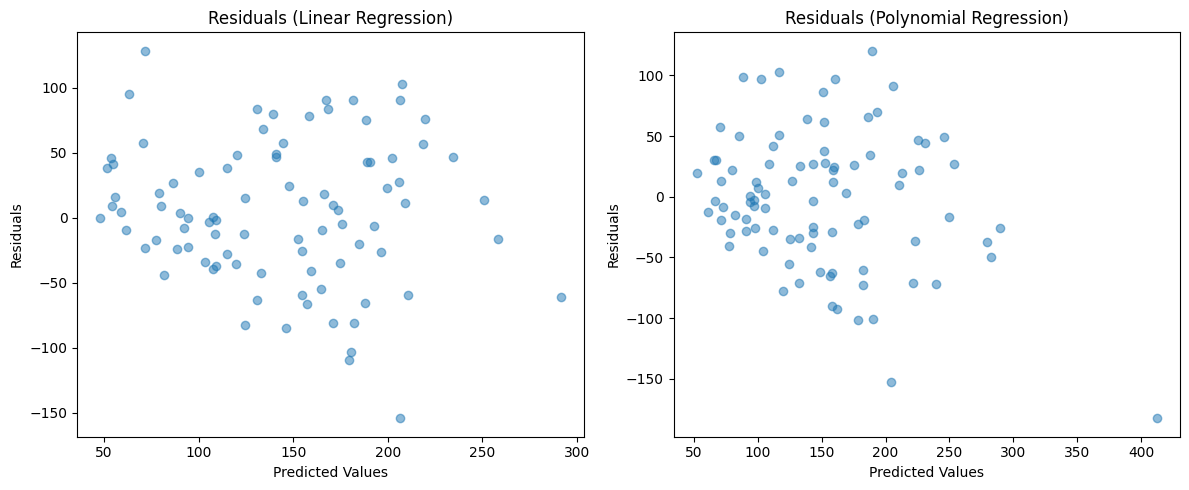

In [10]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(y_pred_linear_test, y_test - y_pred_linear_test, alpha=0.5)
plt.title("Residuals (Linear Regression)")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")

plt.subplot(1, 2, 2)
plt.scatter(y_pred_poly_test, y_test - y_pred_poly_test, alpha=0.5)
plt.title("Residuals (Polynomial Regression)")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")

plt.tight_layout()
plt.show()


In linear regression and polynomial regression, the number of parameters (coefficients) that are being fitted depends on the degree of the polynomial features used and the number of input features (variables). Let's break down the number of parameters for each case:

1. **Linear Regression**:
   - In linear regression, you have one coefficient (parameter) for each input feature, plus an additional intercept term (bias).
   - The total number of parameters in linear regression is equal to the number of input features plus one (intercept).
   - In your case, since you loaded the diabetes dataset, there are 10 input features (variables), so the linear regression model has 10 coefficients for the features and one intercept term.
   - Therefore, you are fitting a total of 11 parameters in linear regression.

2. **Polynomial Regression**:
   - In polynomial regression, you create polynomial features by expanding the original features to include combinations of features up to a certain degree.
   - The total number of parameters in polynomial regression depends on the degree of the polynomial and the number of original input features.
   - The formula for calculating the number of parameters in polynomial regression is given by: `(n + d)! / (d! * n!)`, where `n` is the number of input features and `d` is the degree of the polynomial.
   - In your case, you used a 2nd-degree polynomial (degree=2) and there are 10 input features.
   - Using the formula, the number of parameters for the polynomial regression is `(10 + 2)! / (2! * 10!)`, which simplifies to `(12 * 11) / (2 * 1) = 66`.
   - Therefore, you are fitting a total of 66 parameters in the 2nd-degree polynomial regression.

To explain the parameters of the polynomial regression, you can use the `poly.get_feature_names_out()` method, which will provide the names of the generated polynomial features. These names will include information about which original features and their combinations are included in the polynomial expansion, making it easier to understand the parameters and their relationships in the model.

The `model_estimation` function provided earlier generates several graphs to assess the goodness-of-fit for each of the regression models. Let's discuss the insights you can draw from these graphs for both the linear regression and polynomial regression (2nd degree) models:

**For the Linear Regression Model:**
1. **Residuals Scatter Plot**: The scatter plot of residuals (`y_test - y_pred_test`) shows the spread of the errors around zero. In a well-fitted model, the residuals should be randomly scattered around zero. If you see a clear pattern (e.g., a funnel shape), it may indicate heteroscedasticity or nonlinear relationships that the linear model doesn't capture well.

2. **Percentage Error Scatter Plot**: The scatter plot of percentage errors (`100 * (y_test - y_pred_test) / y_test`) shows how the model's errors vary as a percentage of the actual target values. A well-fitted model should have percentage errors distributed randomly around zero. High and consistent percentage errors may suggest issues with the model's predictive performance.

3. **Histogram of Percentage Error**: The histogram of percentage errors provides a distribution of the errors. Ideally, it should resemble a normal distribution centered around zero. Skewed or multi-modal distributions may indicate problems with the model's predictions.

**For the Polynomial Regression (2nd Degree) Model:**
1. **Residuals Scatter Plot**: Similar to the linear regression model, the residuals scatter plot for polynomial regression should show random scattering around zero. However, due to the increased model complexity, you might expect a better fit to nonlinear patterns, which may lead to reduced scatter compared to linear regression.

2. **Percentage Error Scatter Plot**: The scatter plot of percentage errors should also exhibit randomness around zero. The polynomial regression model's ability to capture nonlinear relationships might result in improved performance, particularly for data with nonlinear patterns.

3. **Histogram of Percentage Error**: The histogram of percentage errors provides insights into the distribution of errors. A well-fitted polynomial model may exhibit a smoother, more symmetric distribution compared to linear regression, particularly if it captures nonlinear patterns effectively.

In both cases, you want to assess the following:

- The scatter plots should show relatively random and evenly distributed points around zero, indicating that the model is capturing the data's patterns effectively.

- The histograms should resemble normal distributions centered around zero, which suggests that the model's errors are unbiased and have consistent behavior.

- Any clear patterns, non-random distributions, or systematic deviations in the plots may indicate areas where the model can be improved or where assumptions are violated.

Overall, these graphs are valuable for visually inspecting the goodness-of-fit and identifying potential issues with the models. It's essential to consider these insights in conjunction with quantitative metrics like MAE, MAPE, and R-squared to get a comprehensive view of the models' performance.